<a href="https://colab.research.google.com/github/mamun216/Data-analysis-project-with-pandas/blob/master/bike_sales_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from google.colab import files
uploaded= files.upload()

Saving sales_data.csv - sales_data.csv to sales_data.csv - sales_data.csv


In [3]:
sales = pd.read_csv('sales_data.csv - sales_data.csv')
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


# What is the mean of customer age?

In [4]:
round(sales['Customer_Age'].mean(),2)

35.92

# Show a density (KDE) and a box plot with the Customer_Age data:

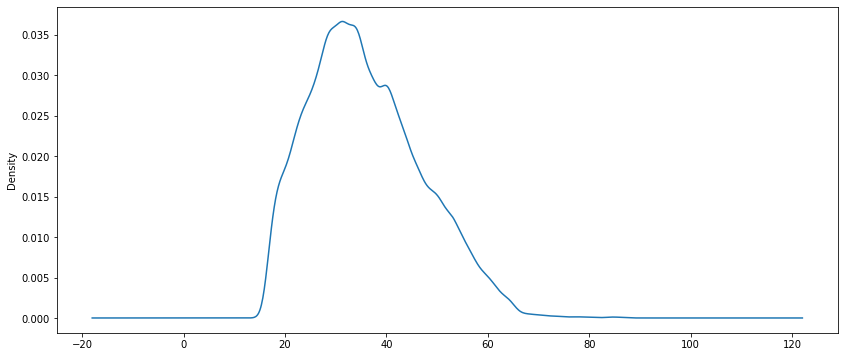

In [5]:
sales['Customer_Age'].plot(kind='kde', figsize=(14,6));

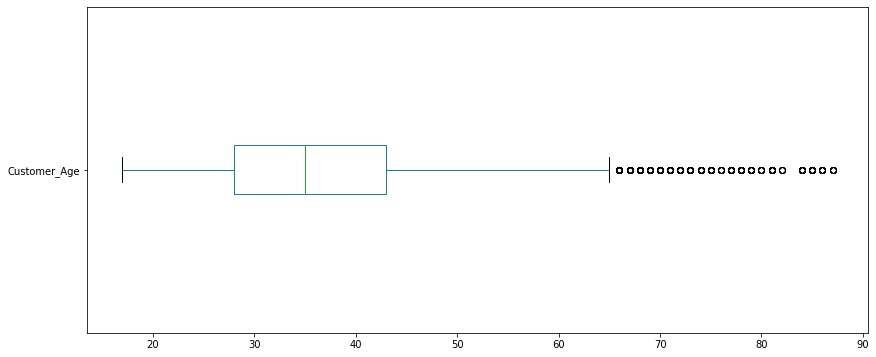

In [6]:
sales['Customer_Age'].plot(kind='box', vert= False, figsize=(14,6));

# Whats the mean of order quantity?

In [7]:
sales['Order_Quantity'].mean()

11.901659648253654

# Show histogram and boxoplot with order quantity data:

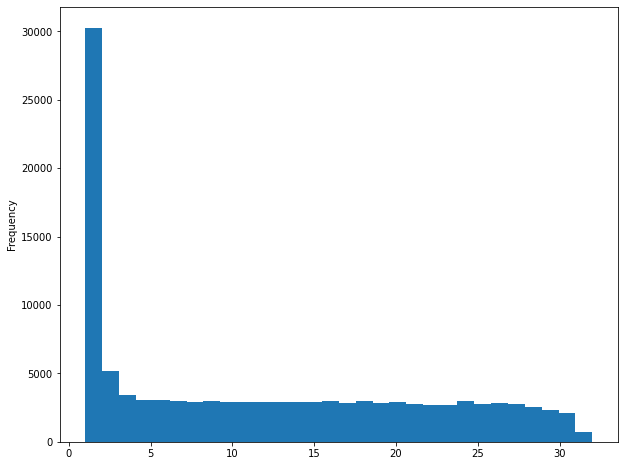

In [8]:
sales['Order_Quantity'].plot(kind='hist', bins=30, figsize=(10,8));

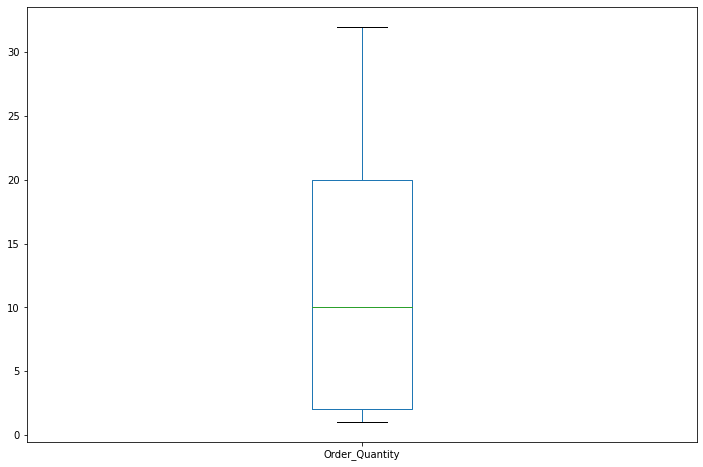

In [9]:
sales['Order_Quantity'].plot(kind='box', figsize=(12,8));

# How many sales per year do we have?

In [10]:
sales.Year.value_counts()

2016    29398
2014    29398
2015    24443
2013    24443
2012     2677
2011     2677
Name: Year, dtype: int64

# Show a pie plot with the previous data:

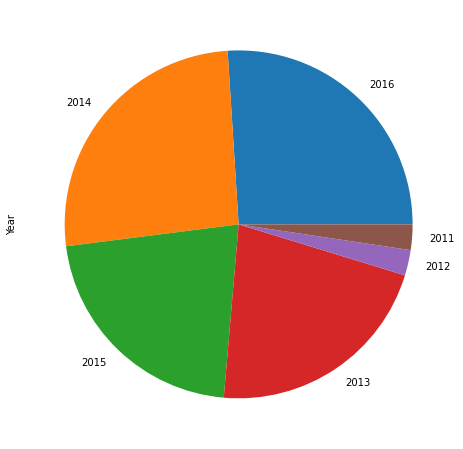

In [11]:
sales['Year'].value_counts().plot(kind='pie', figsize=(12,8));

# How many sales per month do we have?

In [12]:
sales.Month.value_counts()

June         11234
December     11200
May          11128
April        10182
March         9674
January       9284
February      9022
October       8750
November      8734
August        8200
September     8166
July          7462
Name: Month, dtype: int64

# Make a bar plot with month data:

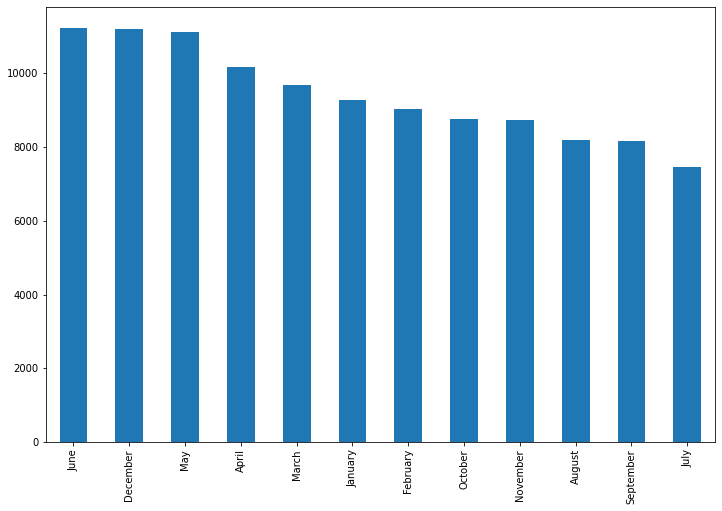

In [13]:
sales['Month'].value_counts().plot(kind='bar', figsize=(12,8));

# Which country has the most sales quantity of sales?

In [14]:
sales.Country.value_counts().head(1)

United States    39206
Name: Country, dtype: int64

# Show a bar plot of the sales per country:

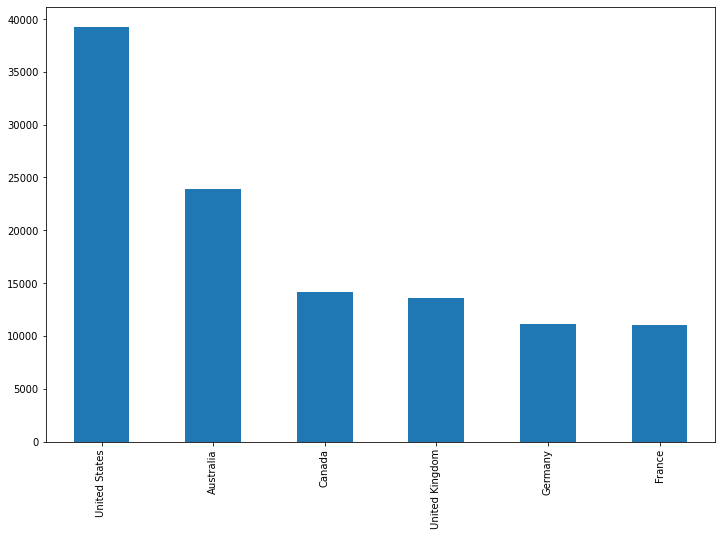

In [15]:
sales['Country'].value_counts().plot(kind='bar', figsize=(12,8));

https://github.com/ine-rmotr-curriculum/FreeCodeCamp-Pandas-Real-Life-Example/blob/master/Exercises_1.ipynb

# Create a list of every product sold

In [16]:
sales['Product'].unique()[:10] # show only first 10 list

array(['Hitch Rack - 4-Bike', 'All-Purpose Bike Stand',
       'Mountain Bottle Cage', 'Water Bottle - 30 oz.',
       'Road Bottle Cage', 'AWC Logo Cap', 'Bike Wash - Dissolver',
       'Fender Set - Mountain', 'Half-Finger Gloves, L',
       'Half-Finger Gloves, M'], dtype=object)

# Create a bar plot showing the 10 most sold products (best sellers):

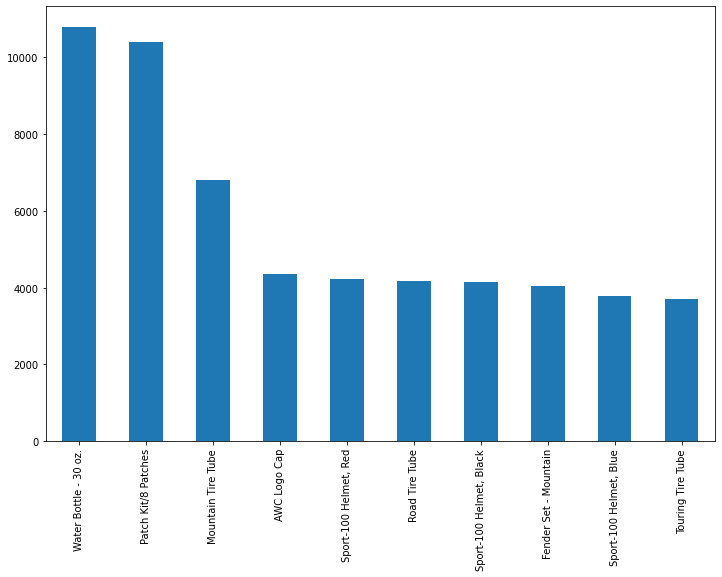

In [17]:
sales['Product'].value_counts().head(10).plot(kind='bar', figsize=(12,8));

# Can you see any relationship between Unit_Cost and Unit_Price?
Show a scatter plot between both columns.

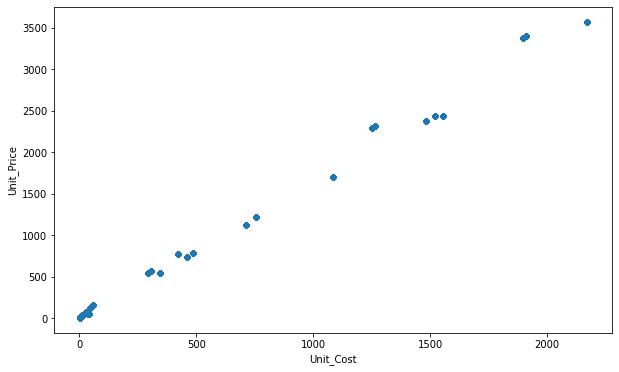

In [18]:
sales.plot(kind = 'scatter', x='Unit_Cost', y='Unit_Price', figsize=(10,6));

# Can you see any relationship between Order_Quantity and Profit?
Show a scatter plot between both columns.

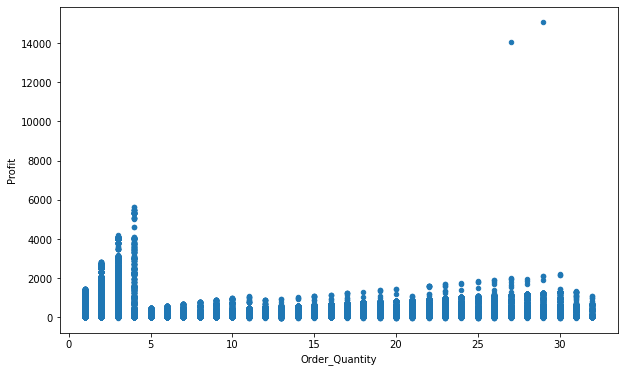

In [19]:
sales.plot(kind = 'scatter', x='Order_Quantity', y='Profit', figsize=(10,6));

# Can you see any relationship between Profit per Country?
Show a grouped box plot per country with the profit values

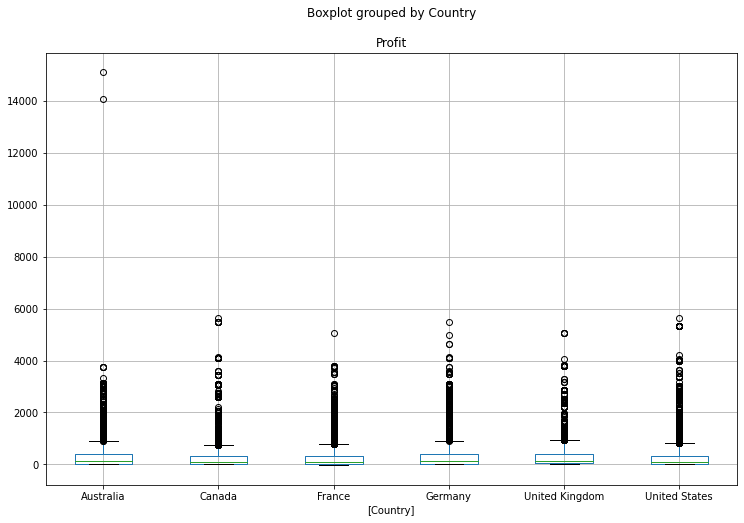

In [20]:
sales[['Country', 'Profit']].boxplot(by='Country', figsize=(12,8));

# Can you see any relationship between the Customer_Age per Country?
Show a grouped box plot per country with the customer age values.

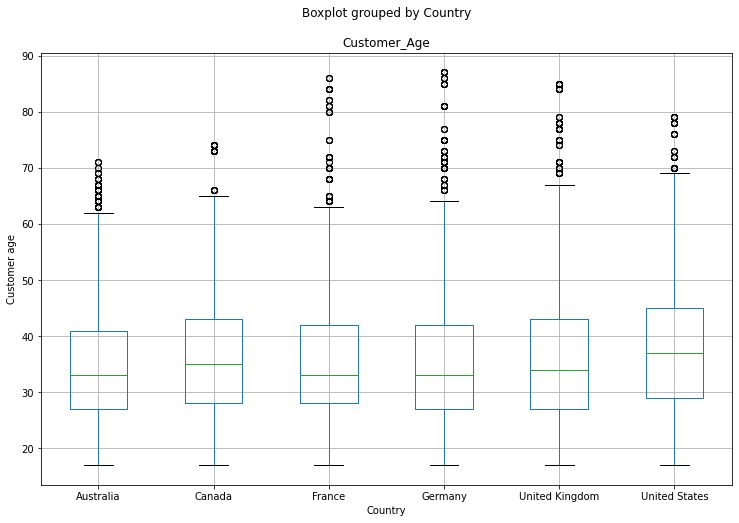

In [21]:
sales[['Country', 'Customer_Age']].boxplot(by='Country', figsize=(12,8));
plt.xlabel("Country")
plt.ylabel("Customer age")
plt.show();

# Add and calculate a new Calculated_Date column
Use Day, Month, Year to create a Date column (YYYY-MM-DD).

In [22]:
sales['Calculated_Date']=sales[['Year', 'Month', 'Day']].apply(lambda x: '{}-{}-{}'.format(x[0],x[1],x[2]), axis = 1)
sales['Calculated_Date'].head()

0    2013-November-26
1    2015-November-26
2       2014-March-23
3       2016-March-23
4         2014-May-15
Name: Calculated_Date, dtype: object

# Parse your Calculated_Date column into a datetime object

In [23]:
sales['Calculated_Date']=pd.to_datetime(sales['Calculated_Date'])
sales['Calculated_Date'].head()

0   2013-11-26
1   2015-11-26
2   2014-03-23
3   2016-03-23
4   2014-05-15
Name: Calculated_Date, dtype: datetime64[ns]

# How did sales evolve through the years?

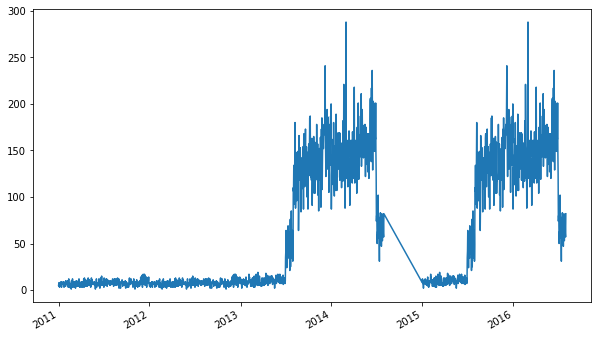

In [24]:
sales['Calculated_Date'].value_counts().plot(kind = 'line',figsize=(10,6));

# Increase 50 U$S revenue to every sale

In [25]:
sales['Revenue'] = sales['Revenue'] + 50
sales['Revenue']

0         1000
1         1000
2         2451
3         2138
4          468
          ... 
113031     234
113032    1233
113033    1233
113034    1310
113035    1257
Name: Revenue, Length: 113036, dtype: int64

In [26]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Calculated_Date
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,1000,2013-11-26
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,1000,2015-11-26
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2451,2014-03-23
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2138,2016-03-23
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,468,2014-05-15


# How many orders were made in Canada or France?

In [27]:
sales.loc[(sales['Country'] == 'Canada') | (sales['Country'] == 'France')].shape[0]

25176

# How many Bike Racks orders were made from Canada?

In [28]:
sales.loc[(sales['Country'] == 'Canada') & (sales['Sub_Category'] == 'Bike Racks')].shape[0]

104

# How many orders were made in each region (state) of France?

In [29]:
france_states= sales.loc[sales['Country']=='France', 'State'].value_counts()
france_states

Seine (Paris)        2328
Seine Saint Denis    1684
Nord                 1670
Hauts de Seine       1084
Essonne               994
Yveline               954
Seine et Marne        394
Moselle               386
Loiret                382
Val d'Oise            264
Garonne (Haute)       208
Val de Marne          158
Charente-Maritime     148
Somme                 134
Loir et Cher          120
Pas de Calais          90
Name: State, dtype: int64

# show a bar plot with the results:

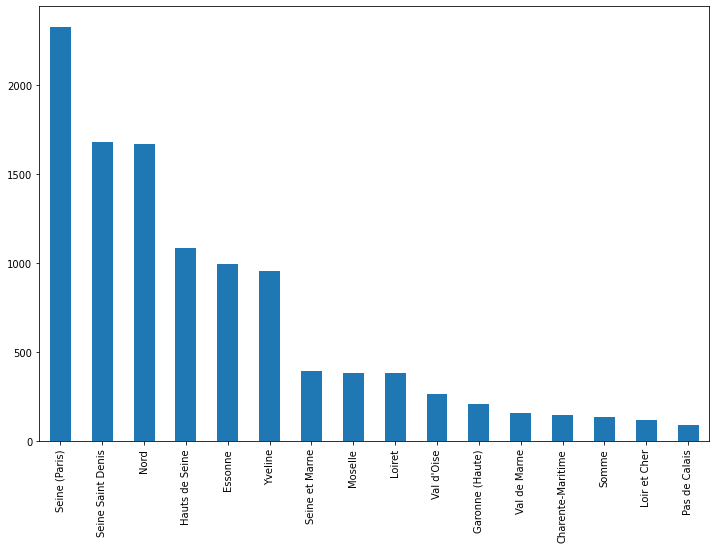

In [30]:
france_states.plot(kind='bar', figsize=(12,8));

# How many sales were made per category?

In [31]:
sales['Sub_Category'].value_counts()

Tires and Tubes      33870
Bottles and Cages    15876
Road Bikes           13430
Helmets              12158
Mountain Bikes        8854
Jerseys               6010
Caps                  4358
Fenders               4032
Touring Bikes         3698
Gloves                2686
Cleaners              1802
Shorts                1794
Hydration Packs       1334
Socks                 1122
Vests                  964
Bike Racks             592
Bike Stands            456
Name: Sub_Category, dtype: int64

# Make a bar plot

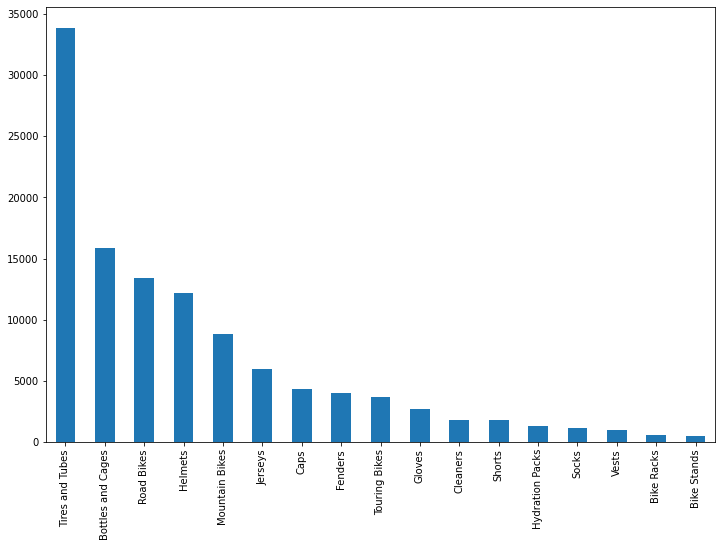

In [32]:
sales['Sub_Category'].value_counts().plot(kind='bar', figsize=(12,8));

# create a pie plot as well

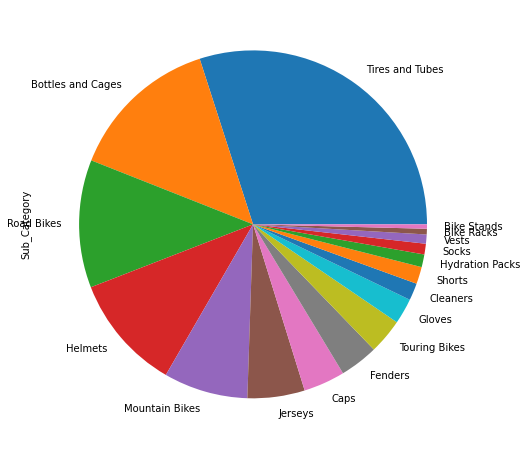

In [33]:
sales['Sub_Category'].value_counts().plot(kind='pie', figsize=(12,8));

# How many orders were made per accessory sub-categories?

In [34]:
accessories= sales.loc[sales['Product_Category']=='Accessories', 'Sub_Category'].value_counts()
accessories

Tires and Tubes      33870
Bottles and Cages    15876
Helmets              12158
Fenders               4032
Cleaners              1802
Hydration Packs       1334
Bike Racks             592
Bike Stands            456
Name: Sub_Category, dtype: int64

# show a bar plot with the results:

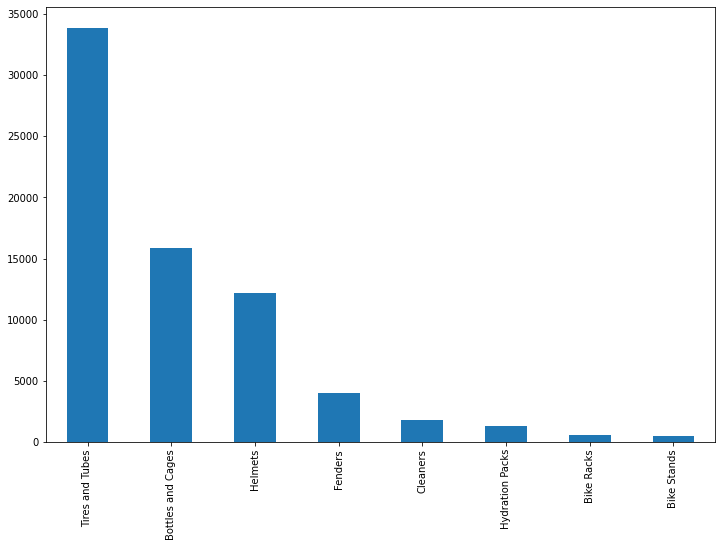

In [35]:
accessories.plot(kind='bar', figsize=(12,8));

# How many orders were made per bike sub-categories?

In [36]:
bikes= sales.loc[sales['Product_Category']=='Bikes', 'Sub_Category'].value_counts()
bikes

Road Bikes        13430
Mountain Bikes     8854
Touring Bikes      3698
Name: Sub_Category, dtype: int64

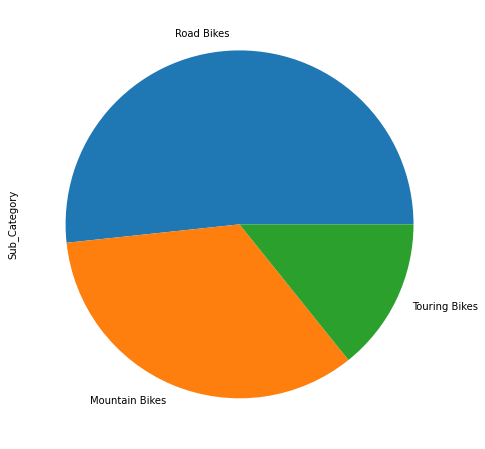

In [37]:
bikes.plot(kind='pie', figsize=(12,8));

# Which gender has the most amount of sales?

In [38]:
sales['Customer_Gender'].value_counts()

M    58312
F    54724
Name: Customer_Gender, dtype: int64

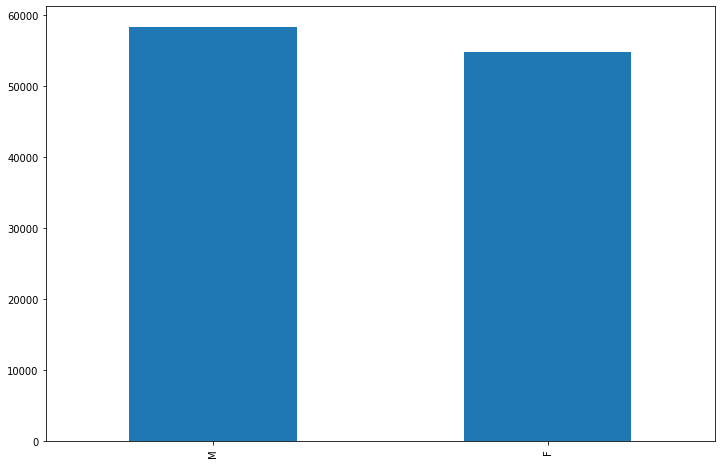

In [39]:
sales['Customer_Gender'].value_counts().plot(kind='bar', figsize=(12,8));

# How many sales with more than 500 in Revenue were made by men?

In [40]:
sales.loc[(sales['Customer_Gender'] == 'M') & (sales['Revenue']>500)].shape[0]

23342

# Get the top-5 sales with the highest revenue

In [43]:
sales.sort_values(['Revenue'], ascending=False).head(5)

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Calculated_Date
112073,2015-07-24,24,July,2015,52,Adults (35-64),M,Australia,Queensland,Clothing,Vests,"Touring-1000 Yellow, 50",29,1482,2384,15096,42978,58124,2015-07-24
112072,2013-07-24,24,July,2013,52,Adults (35-64),M,Australia,Queensland,Clothing,Vests,"Touring-1000 Yellow, 50",27,1482,2384,14055,40014,54119,2013-07-24
71129,2011-07-08,8,July,2011,22,Youth (<25),M,Canada,Alberta,Bikes,Road Bikes,"Road-150 Red, 48",4,2171,3578,5628,8684,14362,2011-07-08
70307,2011-04-30,30,April,2011,44,Adults (35-64),M,Canada,British Columbia,Bikes,Road Bikes,"Road-150 Red, 62",4,2171,3578,5485,8684,14219,2011-04-30
70601,2011-09-30,30,September,2011,19,Youth (<25),F,Canada,British Columbia,Bikes,Road Bikes,"Road-150 Red, 62",4,2171,3578,5485,8684,14219,2011-09-30


# Get the sale with the highest revenue

In [45]:
sales.sort_values(['Revenue'], ascending=False).head(1)

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Calculated_Date
112073,2015-07-24,24,July,2015,52,Adults (35-64),M,Australia,Queensland,Clothing,Vests,"Touring-1000 Yellow, 50",29,1482,2384,15096,42978,58124,2015-07-24


In [46]:
cond = sales['Revenue'] == sales['Revenue'].max()

sales.loc[cond]

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Calculated_Date
112073,2015-07-24,24,July,2015,52,Adults (35-64),M,Australia,Queensland,Clothing,Vests,"Touring-1000 Yellow, 50",29,1482,2384,15096,42978,58124,2015-07-24


# Show the lowest revenue

In [48]:
sales.sort_values(['Revenue'], ascending=True).head(1)

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Calculated_Date
79623,2016-03-29,29,March,2016,24,Youth (<25),M,Canada,British Columbia,Accessories,Tires and Tubes,Patch Kit/8 Patches,1,1,2,1,1,52,2016-03-29


# What is the mean Order_Quantity of orders with more than 10K in revenue?

In [49]:
cond= sales['Revenue']>10000
sales.loc[cond, 'Order_Quantity'].mean()

3.689265536723164

# What is the mean Order_Quantity of orders with less than 10K in revenue?

In [50]:
cond= sales['Revenue']<10000
sales.loc[cond, 'Order_Quantity'].mean()

11.914539380997528


# How many orders were made in May of 2016?

In [52]:
sales.loc[(sales['Year']==2016) & (sales['Month']=='May')].shape[0]

5015

# How many orders were made between May and July of 2016?

In [56]:
sales.loc[(sales['Year']==2016) & (sales['Month'].isin(['May','June', 'July']))].shape[0]

12164

# Show a grouped box plot per month with the profit values.

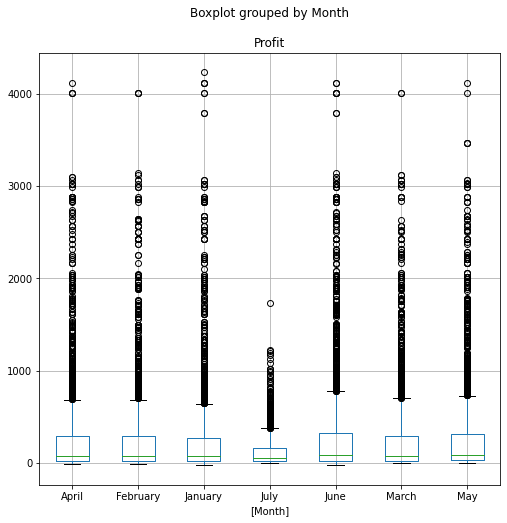

In [65]:
monthly_profit=sales.loc[sales['Year']==2016, ['Profit', 'Month']]
monthly_profit.boxplot(by='Month',figsize=(8,8));

# Add 7.2% TAX on every sale Unit_Price within United States

In [68]:
sales.loc[sales['Country'] == 'United States', 'Unit_Price'] *= 1.072

In [67]:
sales.head(2)

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Calculated_Date
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120.0,590,360,1000,2013-11-26
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120.0,590,360,1000,2015-11-26


In [69]:
sales.loc[sales['Country'] == 'United States', 'Unit_Price'] = sales.loc[sales['Country'] == 'United States', 'Unit_Price'] * 1.072


In [75]:
sales['Unit_Price']*1.072

0         128.640
1         128.640
2         128.640
3         128.640
4         128.640
           ...   
113031     68.608
113032     68.608
113033     68.608
113034     68.608
113035     68.608
Name: Unit_Price, Length: 113036, dtype: float64